In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nxcals.api.extraction.data.builders import *
from scipy.optimize import curve_fit
from datetime import datetime
from madxtools.plot_tool import *
from madxtools.transfer_function import *
def my_mpl_style():
    '''Sets my preferred style options for matplotlib.'''
    import matplotlib as mpl
    # Font sizes
    mpl.rcParams['axes.labelsize'] = 18
    mpl.rcParams['legend.fontsize'] = 18
    mpl.rcParams['axes.titlesize'] = 20  # Change the number for your preferred fontsize
    mpl.rcParams['xtick.labelsize'] = 16
    mpl.rcParams['ytick.labelsize'] = 16
    mpl.rcParams['axes.formatter.limits'] = (-2, 3)
my_mpl_style()

In [5]:
start = "2023-08-30 09:00:00.000"
end = "2023-08-30 20:00:00.000"

selector = "CPS.USER.EAST4"

# Find the Brho through NXCALS

In [21]:
df = DevicePropertyDataQuery.builder(spark).system("CMW").startTime(start).endTime(end).entity().parameter("PR.BMEAS-B-ST/CycleSamples").build().toPandas()
df['avg_flattop_Gauss'] = df['samples'].apply(lambda x: round(np.mean(x["elements"][1000:1500]), 1)) # Hardcoded flattop time
df['Ekin'] = df['avg_flattop_Gauss'].apply(lambda x: (193.737692/208)*(np.sqrt(((1/((3.3356/(70.0789*54)*10000)/x))/193.737692)**2+1)-1), 1) # Hardcoded flattop time
# Add a column with timestamp in datetime format
df["timestamp"] = pd.to_datetime(df['acqStamp'], unit='ns')
df.sort_values(by="timestamp", inplace=True)
df = df[df.selector == selector].reset_index(drop=True)

rho = 70.0789
mean_flattop_Bfield = np.mean(df[df.selector==selector].avg_flattop_Gauss) # in Gauss
Brho = rho*mean_flattop_Bfield/10000 
print(f"Brho = {Brho}")

Brho = 18.59063368820577


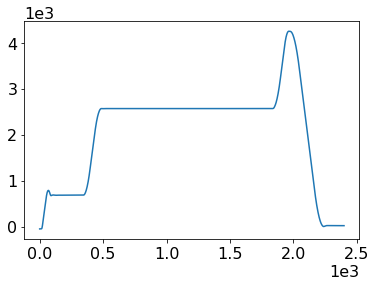

In [22]:
plt.plot(df['samples'].iloc[0]['elements'])

Text(0.5, 1.0, '2023-08-30 09:00:00.000\n2023-08-30 20:00:00.000\nCPS.USER.EAST4')

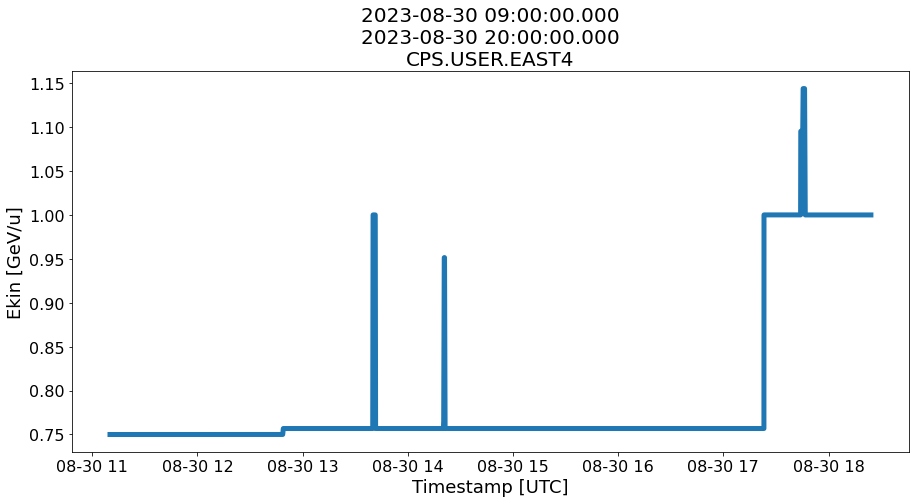

In [23]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(df['timestamp'], df['Ekin'], lw=5)
ax.set_ylabel("Ekin [GeV/u]")
ax.set_xlabel("Timestamp [UTC]")
ax.set_title(start+"\n"+end+"\n"+selector)